# 다중공선성 해결 - 변수 정규화

In [1]:
import pandas as pd

train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = train.drop('type', axis=1)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif['features'] = data.columns

vif

,VIF Factor,features
0,4.007175,index
1,64.107432,quality
2,59.149187,fixed acidity
3,9.610687,volatile acidity
4,9.273444,citric acid
5,3.616414,residual sugar
6,5.715981,chlorides
7,8.420883,free sulfur dioxide
8,14.833789,total sulfur dioxide
9,945.323991,density


In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data)
data_scale = scaler.transform(data)

In [4]:
new_data_df = pd.DataFrame(data_scale)
new_data_df.columns = data.columns

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
vif['features'] = new_data_df.columns

vif

,VIF Factor,features
0,3.848628,index
1,14.491571,quality
2,37.792930,fixed acidity
3,6.978592,volatile acidity
4,9.094026,citric acid
5,14.246815,residual sugar
6,4.590877,chlorides
7,8.009056,free sulfur dioxide
8,11.227393,total sulfur dioxide
9,106.041429,density


# 다중공선성 해결 - 변수 제거

In [7]:
# 종속변수 quality를 제외한 vif 10 이상 변수 제거
new_data = data.drop(['alcohol', 'fixed acidity', 'total sulfur dioxide', 'density', 'pH', 'sulphates'], axis=1)

In [9]:
# VIF 재확인
new_data_df = pd.DataFrame(new_data)
new_data_df.columns = new_data.columns

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(new_data_df.values, i) for i in range(new_data_df.shape[1])]
vif['features'] = new_data_df.columns
vif

,VIF Factor,features
0,3.833384,index
1,14.972137,quality
2,6.241906,volatile acidity
3,6.411839,citric acid
4,2.751270,residual sugar
5,4.407827,chlorides
6,4.853373,free sulfur dioxide


# 다중공선성 해결 - PCA

In [13]:
from sklearn.datasets import load_iris

# iris 객체 생성
iris = load_iris()

# DataFrame으로 변환
df = pd.DataFrame(iris.data)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df['target'] = iris.target
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

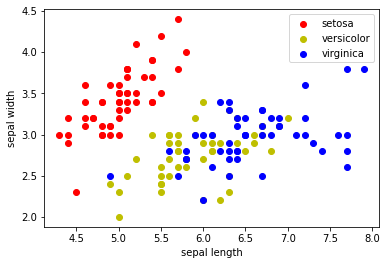

In [18]:
# 색상 지정(setosa: 빨간색, versicolor: 노란색, virginica: 파란색)
color = ['r', 'y', 'b']

# 각 target 별로 다른 색으로 scatter plot
for i, c in enumerate(color):
    x_axis_data = df[df['target']==i]['sepal_length']
    y_axis_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, color=c, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [19]:
# Target 값을 제외한 모든 속성 값을 MinMaxScaler 변환
df_features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
df_scaler = MinMaxScaler().fit_transform(df_features)

In [20]:
# PCA를 이용하여 4차원 변수를 2차원으로 변환
pca = PCA(n_components=2)

In [21]:
# fit()과 transform() 을 호출하여 PCA 변환 / 데이터 반환
pca.fit(df_scaler)
df_pca = pca.transform(df_scaler)
print(df_pca.shape)

(150, 2)


In [23]:
# PCA 변환된 데이터의 컬럼명을 각각 PCA_1, PCA_2로 지정
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PCA_1', 'PCA_2']
df_pca['target'] = df.target
df_pca.head(3)

,PCA_1,PCA_2,target
0,-0.630703,0.107578,0
1,-0.622905,-0.104260,0
2,-0.669520,-0.051417,0


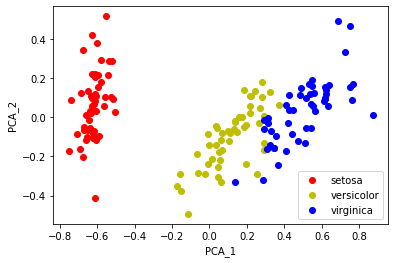

In [25]:
for i, c in enumerate(color):
    x_axis_data = df_pca[df_pca['target']==i]['PCA_1']
    y_axis_data = df_pca[df_pca['target']==i]['PCA_2']
    plt.scatter(x_axis_data, y_axis_data, color=c, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

# 연속형 변수 변환
## 수치 범위 구간을 직접 지정하여 레이블링

In [26]:
# train data 확인
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [29]:
data = train.copy()

# 연속변수 -> 범주형 변수 변환 함수 선언
def func(x):
    if x < 3: return 'lowest'
    elif x < 3.3: return 'low'
    elif x < 3.5: return 'normal'
    else: return 'high'

data['pH'] = train['pH'].apply(lambda x : func(x))

# 변환 데이터 확인
data.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,normal,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,low,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,low,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,low,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,low,0.43,10.9,white


## 판다스 cut() 함수로 레이블링

In [30]:
data = train.copy()

data['alcohol'] = pd.cut(data.alcohol, 5, labels=False)

data.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,1,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,1,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,2,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,2,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,2,white


# Polynomial Features
## 간단예제

In [33]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [34]:
# 임의 데이터 생성
X = np.arange(6).reshape(3, 2)

df = pd.DataFrame(X)
df.columns = ['x_1', 'x_2']
df

,x_1,x_2
0,0,1
1,2,3
2,4,5


In [35]:
# 차원은 2로 설정
poly_features = PolynomialFeatures(degree=2)

# fit_transform 함수로 데이터 변환
df_poly = poly_features.fit_transform(df)
df_poly = pd.DataFrame(df_poly)

# df_ply의 컬럼 변경
df_poly.columns = ['1', 'x1', 'x2', 'x1^2', 'x1*x2', 'x2^2']
df_poly

,1,x1,x2,x1^2,x1*x2,x2^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0


## 와인 품질 분류 데이터에 적용해보기

In [37]:
# type 데이터 원-핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(train[['type']])

onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)

data = train.copy()
data = pd.concat([data, onehot], axis=1)

data = data.drop(columns=['type'])

In [39]:
# train 데이터를 PolynomialFeatures를 이용하여 변환
poly_features = PolynomialFeatures(degree=2)

df = data.drop('quality', axis=1) # 와인 품질은 target이므로 제외
df_poly = poly_features.fit_transform(df)
df_poly = pd.DataFrame(df_poly)

In [40]:
# Decision Tree Classifier 모델을 변환된 데이터로 학습
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(df_poly, train['quality'])

DecisionTreeClassifier()

In [41]:
# test 데이터 원-핫 인코딩
onehot = encoder.transform(test[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)

tdata = test.copy()
tdata = pd.concat([tdata, onehot], axis=1)

tdata = tdata.drop(columns=['type'])

In [43]:
# test 데이터 변환
poly_features = PolynomialFeatures(degree=2)

test_poly = poly_features.fit_transform(tdata)
test_poly = pd.DataFrame(test_poly)

In [44]:
# 결과값 추론
pred = model.predict(test_poly)

In [45]:
# 정답 파일 생성
submission = pd.read_csv('./data/sample_submission.csv')
submission['quality'] = pred
submission.to_csv('poly.csv', index = False)